In [1]:
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Students_Grading_Dataset.csv')


In [3]:
print(df.head())
print(df.isnull().sum())

  Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65   

In [4]:
score_columns = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score']
attendance_mean = df['Attendance (%)'].mean()
df['Attendance (%)'].fillna(attendance_mean, inplace=True)

# Calculate the sum of other scores
other_scores_sum = df['Quizzes_Avg'] + df['Midterm_Score'] + df['Final_Score'] + df['Participation_Score'] + df['Projects_Score']
df['Assignments_Avg'].fillna(df['Total_Score'] - other_scores_sum, inplace=True)
duplicates = df.duplicated(subset='Student_ID')
print(f"Number of duplicate rows: {duplicates.sum()}")
duplicate_rows = df[duplicates]
print(duplicate_rows)
print(df.isnull().sum())


Number of duplicate rows: 0
Empty DataFrame
Columns: [Student_ID, First_Name, Last_Name, Email, Gender, Age, Department, Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, Total_Score, Grade, Study_Hours_per_Week, Extracurricular_Activities, Internet_Access_at_Home, Parent_Education_Level, Family_Income_Level, Stress_Level (1-10), Sleep_Hours_per_Night]
Index: []

[0 rows x 23 columns]
Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                     

C:\Users\arthi\AppData\Local\Temp\ipykernel_16932\1838877102.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance (%)'].fillna(attendance_mean, inplace=True)
C:\Users\arthi\AppData\Local\Temp\ipykernel_16932\1838877102.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [5]:
columns_to_remove = ['First_Name', 'Last_Name', 'Email', 'Age', 'Parent_Education_Level', 'Family_Income_Level']
df = df.drop(columns=columns_to_remove)


<Axes: ylabel='Frequency'>

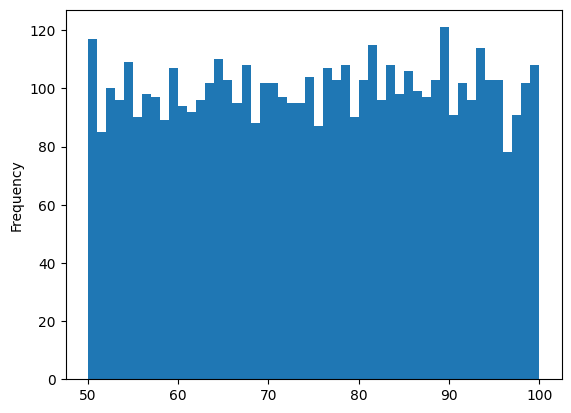

In [6]:


df['Total_Score'].plot(kind='hist', bins=50)

<Axes: ylabel='Density'>

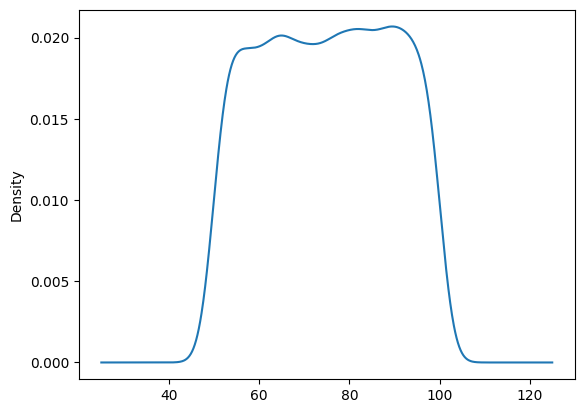

In [7]:
df['Total_Score'].plot(kind="kde")

In [8]:
df['Total_Score'].skew()

np.float64(-0.02238469633213024)

<Axes: >

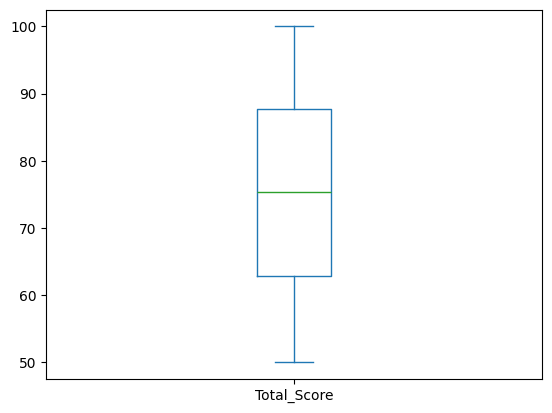

In [9]:
df['Total_Score'].plot(kind="box")

In [10]:
df["Total_Score"].describe()

count    5000.000000
mean       75.121804
std        14.399941
min        50.020000
25%        62.835000
50%        75.395000
75%        87.652500
max        99.990000
Name: Total_Score, dtype: float64

In [11]:
df["Study_Hours_per_Week"].describe()

count    5000.000000
mean       17.658860
std         7.275864
min         5.000000
25%        11.400000
50%        17.500000
75%        24.100000
max        30.000000
Name: Study_Hours_per_Week, dtype: float64

In [12]:
df.describe()

,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,75.431409,70.326844,69.640788,44.365430,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,13.610481,17.213209,17.238744,91.377065,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,50.010000,40.000000,40.000000,-323.540000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,64.737500,55.457500,54.667500,58.087500,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,75.431409,70.510000,69.735000,71.875000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,86.182500,84.970000,84.500000,85.570000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


<Axes: ylabel='Frequency'>

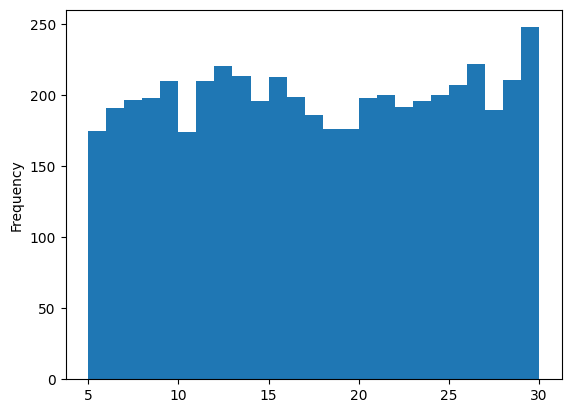

In [13]:
df['Study_Hours_per_Week'].plot(kind='hist',bins=25)

<Axes: ylabel='Density'>

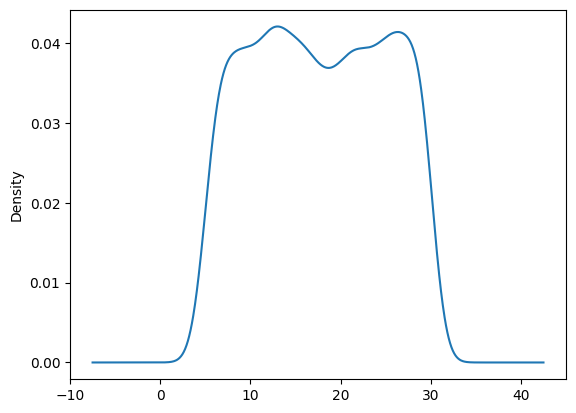

In [14]:
df['Study_Hours_per_Week'].plot(kind="kde")

In [15]:

df['Study_Hours_per_Week'].skew()

np.float64(0.0007433558913855831)

<Axes: >

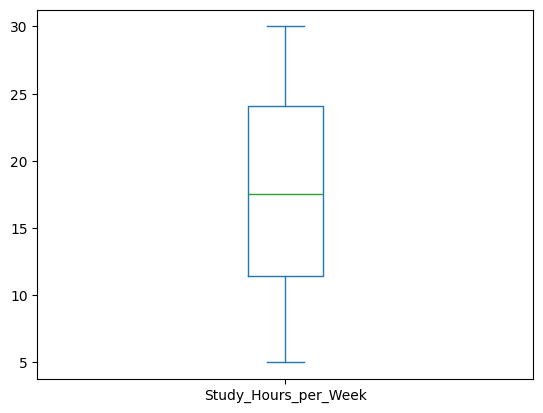

In [16]:
df['Study_Hours_per_Week'].plot(kind="box")


<Axes: >

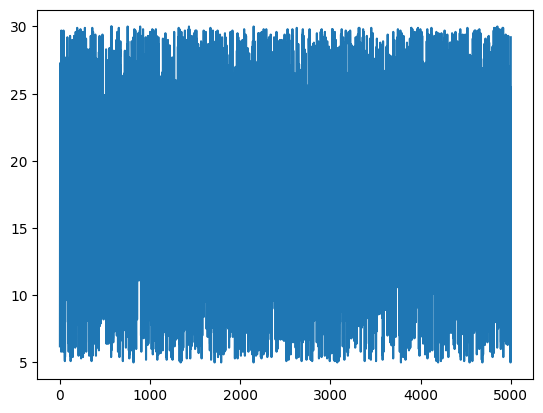

In [17]:
df['Study_Hours_per_Week'].plot(kind="line")

<Axes: xlabel='Grade'>

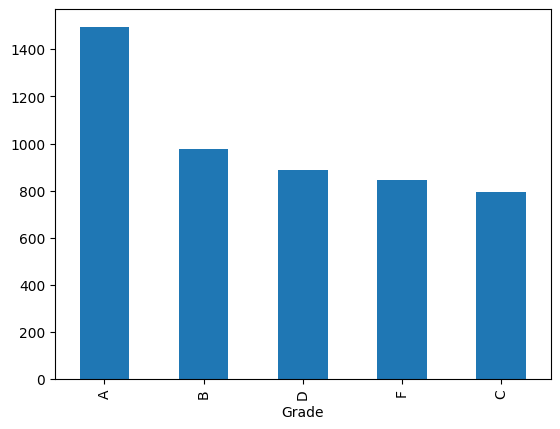

In [18]:

df['Grade'].value_counts()
df['Grade'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

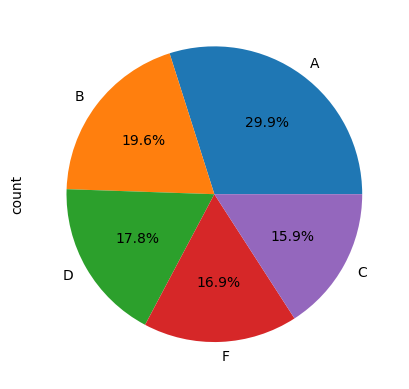

In [19]:
df['Grade'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Stress_Level (1-10)', ylabel='Grade'>

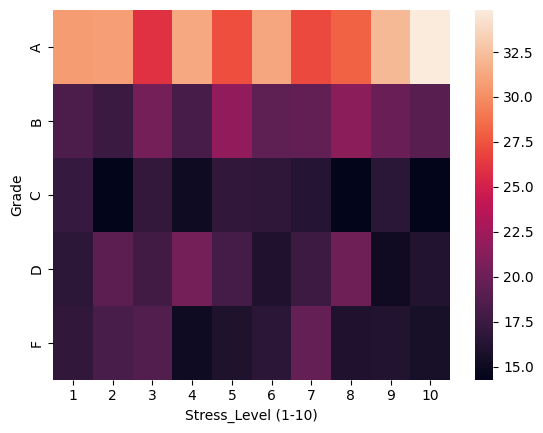

In [20]:
sns.heatmap(pd.crosstab(df['Grade'],df['Stress_Level (1-10)'],normalize='columns')*100)

In [21]:
pd.crosstab(df['Grade'],df["Gender"],normalize='columns')*100

Gender,Female,Male
Grade,,
A,30.788077,29.047432
B,19.232340,19.874559
C,15.639036,16.111329
D,17.884851,17.679341
F,16.455696,17.287338


In [22]:
pd.crosstab(df['Grade'],df["Stress_Level (1-10)"],normalize='columns')*100

Stress_Level (1-10),1,2,3,4,5,6,7,8,9,10
Grade,,,,,,,,,,
A,30.674847,30.753968,25.933202,31.332083,27.272727,31.185031,26.993865,28.053435,32.172131,34.836066
B,18.404908,17.460317,20.432220,18.198874,21.818182,19.334719,19.427403,21.564885,19.877049,19.057377
C,17.177914,14.285714,17.092338,15.009381,16.969697,16.839917,16.359918,14.312977,16.598361,14.344262
D,16.768916,19.246032,17.878193,20.450281,17.979798,16.008316,17.586912,20.038168,15.163934,16.188525
F,16.973415,18.253968,18.664047,15.009381,15.959596,16.632017,19.631902,16.030534,16.188525,15.573770


In [23]:
pd.crosstab(df['Gender'],df["Stress_Level (1-10)"],normalize='columns')*100

Stress_Level (1-10),1,2,3,4,5,6,7,8,9,10
Gender,,,,,,,,,,
Female,47.239264,50.0,47.740668,48.592871,49.89899,47.609148,47.034765,52.290076,50.409836,48.770492
Male,52.760736,50.0,52.259332,51.407129,50.10101,52.390852,52.965235,47.709924,49.590164,51.229508


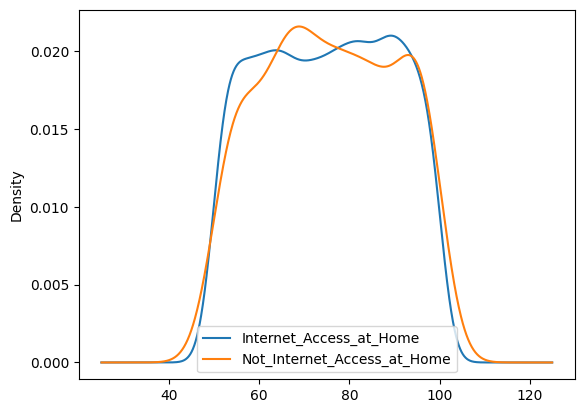

In [24]:
df[df['Internet_Access_at_Home'] == 'Yes']['Total_Score'].plot(kind='kde',label='Internet_Access_at_Home')
df[df['Internet_Access_at_Home'] == 'No']['Total_Score'].plot(kind='kde',label='Not_Internet_Access_at_Home')
plt.legend()
plt.show()

In [25]:
df[df['Grade'] == "A"]['Total_Score'].mean()


np.float64(74.43559197324416)

In [26]:
df['Grade'].value_counts()

Grade
A    1495
B     978
D     889
F     844
C     794
Name: count, dtype: int64

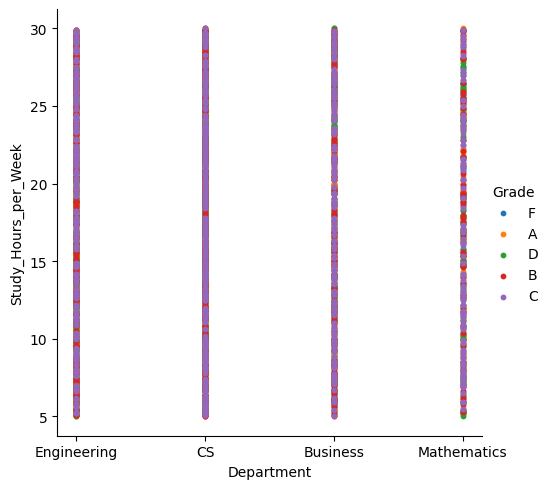

In [27]:
sns.FacetGrid(df, hue="Grade",height=5).map(plt.scatter, "Department", "Study_Hours_per_Week",s=10).add_legend()
plt.show()

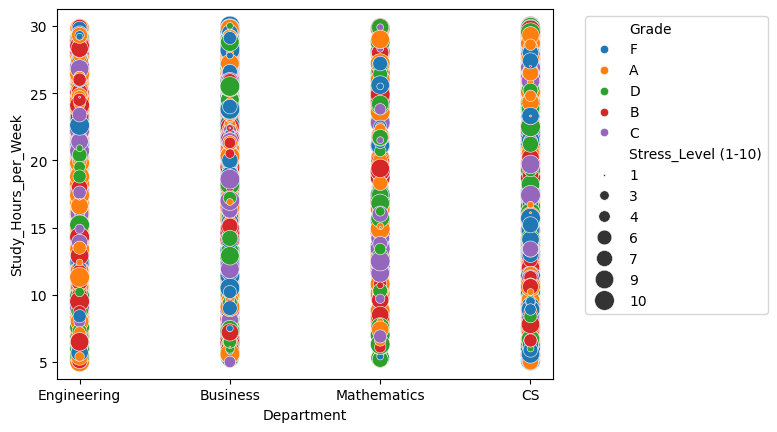

In [28]:


import seaborn as sns
import matplotlib.pyplot as plt

# Convert Stress_Level (1-10) to integers
df["Stress_Level (1-10)"] = df["Stress_Level (1-10)"].astype(int)

# Create a scatter plot with three variables
sns.scatterplot(data=df, x="Department", y="Study_Hours_per_Week", hue="Grade", size="Stress_Level (1-10)", sizes=(2, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




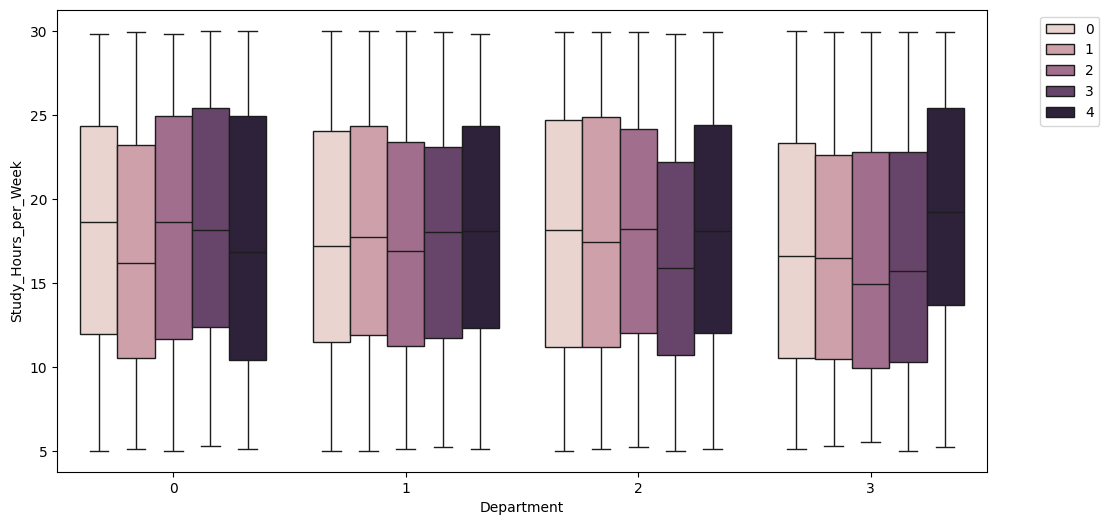

In [30]:
df["Stress_Level (1-10)"] = df["Stress_Level (1-10)"].astype(int)

# Create a box plot with three variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Department", y="Study_Hours_per_Week", hue="Grade")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:

df["Stress_Level (1-10)"] = df["Stress_Level (1-10)"].astype('category').cat.codes
df["Grade"] = df["Grade"].astype('category').cat.codes
df["Department"] = df["Department"].astype('category').cat.codes
# Calculate the correlation matrix
correlation_matrix = df[["Department","Stress_Level (1-10)", "Study_Hours_per_Week", "Grade"]].corr()

# Display the correlation matrix
print(correlation_matrix)

                      Department  Stress_Level (1-10)  Study_Hours_per_Week  \
Department              1.000000            -0.005378             -0.028696   
Stress_Level (1-10)    -0.005378             1.000000              0.004551   
Study_Hours_per_Week   -0.028696             0.004551              1.000000   
Grade                  -0.010759            -0.024795             -0.002596   

                         Grade  
Department           -0.010759  
Stress_Level (1-10)  -0.024795  
Study_Hours_per_Week -0.002596  
Grade                 1.000000  
